In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [3]:
data=pd.read_csv(r"Z:\Second Semister\Machine Learning\Assignment\Assignment NO.2\cars_data.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### heatmap showing the correlation coefficients between all pairs of features in the dataset.

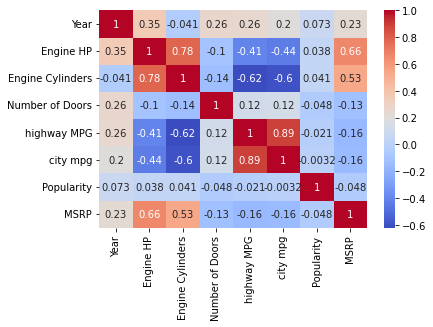

In [7]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True);

### Preprocess the data

In [8]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].median())

In [10]:
data['Engine HP'].isnull().sum()

0

In [11]:
data['Engine Cylinders']=data['Engine Cylinders' ].fillna(data['Engine Cylinders'].median())

In [12]:
data['Engine HP'].isnull().sum()

0

In [13]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Linear Regression

# X= Independent variable=Engine HP'

# Y=target variable/dependent varaible='MSRP'

In [14]:
x=data.iloc[:,4:5].values
x

array([[335.],
       [300.],
       [300.],
       ...,
       [300.],
       [300.],
       [221.]])

In [15]:
y=data.iloc[:,-1:].values
y

array([[46135],
       [40650],
       [36350],
       ...,
       [50620],
       [50920],
       [28995]], dtype=int64)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
#Implement classifier based on Multiple regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
predictions = model.predict(x_test)  # x test varun y test value predict keli
predictions

array([[50376.35988125],
       [24105.86633875],
       [91658.56401946],
       ...,
       [40994.04075893],
       [10970.6195675 ],
       [39117.57693446]])

In [20]:
y_test

array([[39460],
       [ 2107],
       [56260],
       ...,
       [53450],
       [23605],
       [26600]], dtype=int64)

<AxesSubplot:ylabel='Density'>

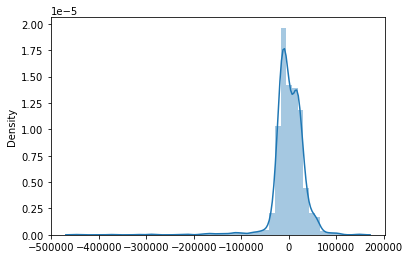

In [21]:
import seaborn as sns
sns.distplot(predictions-y_test)

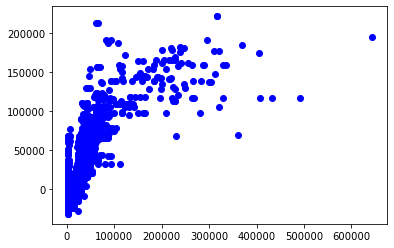

In [22]:

plt.scatter(y_test,predictions, color='blue')


<AxesSubplot:>

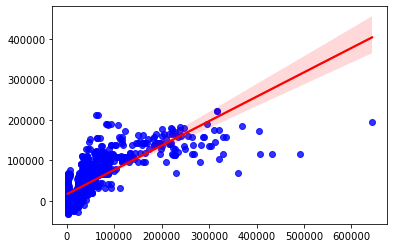

In [23]:
sns.regplot(x = y_test, y = predictions, color = 'blue', line_kws = {'color': 'red'})

In [24]:
model.score(x_train,y_train)

0.42785224193006355

# Interpretation=

In [ ]:
In Cars Dataset the we take the dependent(target) variable as 'MSRP'

# Multiple Regression

# X= Independent variable='Year','Engine HP','Engine Cylinders'

# Y=target variable/dependent varaible='MSRP'

In [26]:
x=np.array(data[['Year','Engine HP','Engine Cylinders']])
x

array([[2011.,  335.,    6.],
       [2011.,  300.,    6.],
       [2011.,  300.,    6.],
       ...,
       [2012.,  300.,    6.],
       [2013.,  300.,    6.],
       [2006.,  221.,    6.]])

In [27]:
y=np.array(data['MSRP'])
y

array([46135, 40650, 36350, ..., 50620, 50920, 28995], dtype=int64)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
#Implement classifier based on Multiple regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
predictions = model.predict(x_test)  # x test varun y test value predict keli
predictions

array([49057.29804003, 11626.12887366, 42461.89912372, ...,
       17430.75872277, -8237.07544041, 16463.32041458])

In [31]:
y_test

array([29695, 30495, 37650, ..., 25675, 17590, 27350], dtype=int64)

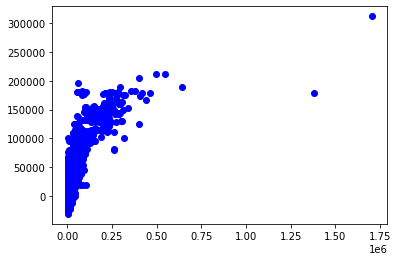

In [32]:
#Plotting the Best-fit Linear Regression Graph
plt.scatter(y_test,predictions, color='blue')

<AxesSubplot:>

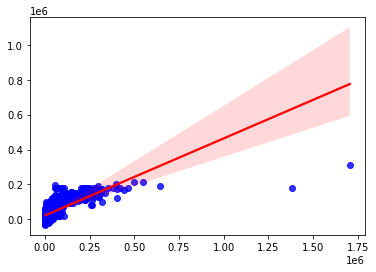

In [33]:
sns.regplot(x = y_test, y = predictions, color = 'blue', line_kws = {'color': 'red'})

In [34]:
model.score(x_train,y_train)

0.43471288238844963

In [35]:
model.score(x_test,y_test)

0.44961985309048047